<a href="https://colab.research.google.com/github/450fausto/Productivity/blob/main/Proyecto_Fase3_mod2_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BEDU: Data Science 3 (Santander Universidades)**
# *Machine Learning*

## Predicción de Productividad en Empleados de la Industria Textil

__Equipo 1__

El equipo de colaboradores en este trabajo está compuesto por:
- __Gómez Barraza__, Karla Daniela
- __Guevara Moreno__, Fernando
- __Muñoz Esparza__, José Cruz
- __Rodríguez Rivera__, Gil Estéfano
- __Rosado Martínez__, Ana Elizabeth

# Postwork 1

El objetivo de este postwork es definir el proyecto que se estará desarrollando a lo largo del Módulo de Machine Learning. 
Durante este bloque se eligió trabajar con el Dataset *Productivity Prediction of Garment Employees*, obtenido de la plataforma *Kaggle*, mismo que se puede visualizar en el siguiente [link](https://www.kaggle.com/ishadss/productivity-prediction-of-garment-employees).
Este Dataset nos permitirá hacer un análisis predictivo sobre la productividad de los empleados en la industria textil.

In [ ]:
# Se importan las librerías para el análisis y operacion con datos
import pandas as pd
import numpy as np

# Para graficar y hacer visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Se lee el dataset a utilizar
df=pd.read_csv('https://raw.githubusercontent.com/450fausto/Productivity/main/garments_worker_productivity.csv')

# Descripción del dataset

In [ ]:
# Se hace el análisis exploratorio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
df.date.unique()

array(['1/1/2015', '1/3/2015', '1/4/2015', '1/5/2015', '1/6/2015',
       '1/7/2015', '1/8/2015', '1/10/2015', '1/11/2015', '1/12/2015',
       '1/13/2015', '1/14/2015', '1/15/2015', '1/17/2015', '1/18/2015',
       '1/19/2015', '1/20/2015', '1/21/2015', '1/22/2015', '1/24/2015',
       '1/25/2015', '1/26/2015', '1/27/2015', '1/28/2015', '1/29/2015',
       '1/31/2015', '2/1/2015', '2/2/2015', '2/3/2015', '2/4/2015',
       '2/5/2015', '2/7/2015', '2/8/2015', '2/9/2015', '2/10/2015',
       '2/11/2015', '2/12/2015', '2/14/2015', '2/15/2015', '2/16/2015',
       '2/17/2015', '2/18/2015', '2/19/2015', '2/22/2015', '2/23/2015',
       '2/24/2015', '2/25/2015', '2/26/2015', '2/28/2015', '3/1/2015',
       '3/2/2015', '3/3/2015', '3/4/2015', '3/5/2015', '3/7/2015',
       '3/8/2015', '3/9/2015', '3/10/2015', '3/11/2015'], dtype=object)

In [ ]:
df.quarter.unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

Aquí vemos que 'finishing' y 'finishing ' sólo se diferencian por el espacio al final, así que procedemos a eliminar ese espacio. 

In [ ]:
df.department=pd.Series(map(lambda x: x.strip(), df.department))

In [ ]:
df.department.unique()

array(['sweing', 'finishing'], dtype=object)

In [ ]:
df.day.unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

In [ ]:
np.sort(df.team.unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
np.sort(df.targeted_productivity.unique())

array([0.07, 0.35, 0.4 , 0.5 , 0.6 , 0.65, 0.7 , 0.75, 0.8 ])

In [ ]:
np.sort(df.smv.unique())

array([ 2.9 ,  3.9 ,  3.94,  4.08,  4.15,  4.3 ,  4.6 ,  5.13, 10.05,
       11.41, 11.61, 12.52, 14.61, 14.89, 15.09, 15.26, 15.28, 16.1 ,
       18.22, 18.79, 19.31, 19.68, 19.87, 20.1 , 20.2 , 20.4 , 20.55,
       20.79, 21.25, 21.82, 21.98, 22.4 , 22.52, 22.53, 22.94, 23.41,
       23.54, 23.69, 24.26, 25.31, 25.9 , 26.16, 26.66, 26.82, 26.87,
       27.13, 27.48, 28.08, 29.12, 29.4 , 30.1 , 30.33, 30.4 , 30.48,
       31.83, 38.09, 40.99, 41.19, 42.27, 42.41, 42.97, 45.67, 48.18,
       48.68, 48.84, 49.1 , 50.48, 50.89, 51.02, 54.56])

In [ ]:
df.wip.dtype

dtype('float64')

In [ ]:
df.over_time.unique().dtype

dtype('int64')

In [ ]:
np.sort(df.incentive.unique())

array([   0,   21,   23,   24,   25,   26,   27,   29,   30,   32,   33,
         34,   35,   37,   38,   40,   44,   45,   46,   49,   50,   53,
         54,   55,   56,   60,   62,   63,   65,   69,   70,   75,   81,
         88,   90,   93,   94,   98,  100,  113,  119,  138,  960, 1080,
       1200, 1440, 2880, 3600])

In [ ]:
np.sort(df.idle_time.unique())

array([  0. ,   2. ,   3.5,   4. ,   4.5,   5. ,   6.5,   8. ,  90. ,
       150. , 270. , 300. ])

In [ ]:
np.sort(df.idle_men.unique())

array([ 0, 10, 15, 20, 25, 30, 35, 37, 40, 45])

In [ ]:
df.no_of_style_change.unique()

array([0, 1, 2])

In [ ]:
np.sort(df.no_of_workers.unique())

array([ 2. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. , 11. , 12. , 14. ,
       15. , 16. , 17. , 18. , 19. , 20. , 21. , 22. , 24. , 25. , 26. ,
       27. , 28. , 29.5, 30.5, 31. , 31.5, 32. , 33. , 33.5, 34. , 35. ,
       38. , 39. , 42. , 44. , 45. , 46. , 47. , 48. , 49. , 50. , 51. ,
       51.5, 52. , 53. , 54. , 54.5, 55. , 55.5, 56. , 56.5, 57. , 57.5,
       58. , 58.5, 59. , 59.5, 60. , 89. ])

In [ ]:
df.actual_productivity.unique().dtype

dtype('float64')

## Descripción de las columnas

- date: La fecha en formato MM-DD-YYYY
- quarter: la porción del mes. Un mes dividido en cuatro partes
- department: Departamento asociado a la instancia
- team: Número de equipo
- targeted_productivity: Target productivity para cada equipo y para cada día
- smv: Standard Minute Value, es el tiempo asignado para una tarea
- wip: Work in progress. Incluye el número de artículos sin terminar
- over_time: Representa la cantidad de tiempo extra por cada equipo en minutos
- incentive: Representa la cantidad de incentivo financiero (en BDT) que permite o motiva un curso de acción en particular.
- idle_time: La cantidad de tiempo en que la producción fue interrumpida debido a diversas razones 
- idle_men: Cantidad de trabajadores inactivos debido a una interrupción
- no_of_style_change: Número de cambios de estilo
- no_of_workers: Número de trabajadores por equipo
- actual_productivity: El valor de productividad real que varía
de 0.0 a 1.0



In [ ]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


# Postwork 2

La intención de este postwork es crear módulos de separación, evaluación y validación de algoritmos de Machine Learning. El módulo MLUtilities se puede encontrar en el siguiente [Notebook](https://colab.research.google.com/drive/1lvk9P-tE73ORJYZCYEC8zCSAPq1KpcVv#scrollTo=wfxXRPatCOw7).

# Postwork 3

- Evalúa si tu proyecto puede resolverse con un algoritmo no supervisado. Recuerda que puede que las clases y categorías que obtengas no sean las que esperas. Pregúntate si el proyecto se verá beneficiado con la agrupación por clústeres.
- Si es el caso, primero enuncia qué es lo que deseas lograr: recuerda que de nada sirve el mejor algoritmo de Machine Learning si no tienes idea de lo que quieres obtener.
- Lleva tu bitácora de experimentos y prueba si te funciona el variar la cantidad de clústeres: ¿Tener menos clústeres te da mejores resultados? ¿Tener más clústeres te ayuda a tomar mejores decisiones?
- Construye tu proyecto con Jupyter Notebook. Utiliza lo que vimos en esta clase para ello. Una vez que has probado que funciona adecuadamente, haz un archivo de Python 3 con la configuración elegida y el proyecto elegido. - Recuerda que necesitarás presentar evidencias de que tu hipótesis se respondió.


In [ ]:
df_sweing=df[df.department=='sweing']
df_finishing=df[df.department=='finishing']

In [ ]:
df_finishing[['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']].corr()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity
targeted_productivity,1.000000,-0.049843,NaN,0.000947,-0.024134,NaN,NaN,-0.009616,0.097510
smv,-0.049843,1.000000,NaN,0.149988,-0.046003,NaN,NaN,0.204799,0.205018
wip,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
over_time,0.000947,0.149988,NaN,1.000000,-0.131287,NaN,NaN,0.626890,0.049609
incentive,-0.024134,-0.046003,NaN,-0.131287,1.000000,NaN,NaN,0.024621,0.013277
idle_time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
idle_men,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_workers,-0.009616,0.204799,NaN,0.626890,0.024621,NaN,NaN,1.000000,0.274002
actual_productivity,0.097510,0.205018,NaN,0.049609,0.013277,NaN,NaN,0.274002,1.000000


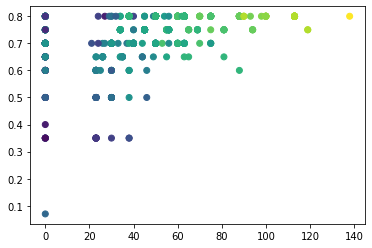

In [ ]:
plt.scatter(df_sweing.incentive, df_sweing.targeted_productivity, c=df_sweing.actual_productivity)